In [12]:
%pylab inline 
# https://www.terminal.com/snapshot/86889ee10f164c1bebcb47a37007e490d7a4c26fb20d6772c6eb232701868ff0
# pandas and numpy
# not so much of pandas but for read_csv which is more efficient than numpy.loadtxt
import numpy as np
import pandas as pd

# scikit-learn classifiers and cross validation utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

# scikit-learn dimension reduction
from sklearn.decomposition import PCA

# scikit-learn dataset processing utils
from sklearn.preprocessing import MinMaxScaler

Populating the interactive namespace from numpy and matplotlib


In [6]:
df = pd.read_csv('/root/machine-learning-classify-handwritten-digit/randomForest/Data/train.csv')
df = df.astype('float64')
df.shape


(42000, 785)

In [9]:
df.ix[1000:1010,200:215]

,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213
1000,0,0,0,0,0,0,0,0,0,0,211,239,42,0,0
1001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,51,254,254,139,0
1003,0,0,0,0,0,0,0,224,253,222,72,0,0,0,0
1004,0,0,0,0,0,0,0,0,2,132,254,215,55,0,0
1005,0,0,0,46,221,253,253,253,183,253,253,253,253,228,0
1006,0,0,0,0,0,0,0,0,12,171,252,253,252,252,230
1007,0,0,0,0,0,0,0,0,0,0,0,0,0,34,82
1008,0,0,0,0,0,0,0,0,0,0,10,29,41,141,141
1009,0,0,0,0,0,0,241,252,106,0,0,0,0,0,253


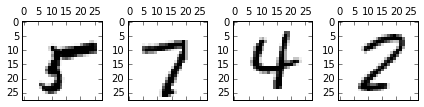

In [13]:
f, (ax1, ax2, ax3, ax4) = subplots(ncols=4)

imsize = (28, 28)
ax1.matshow(np.reshape(df.ix[35023,1:], imsize), cmap='gray_r')
ax2.matshow(np.reshape(df.ix[1008,1:], imsize), cmap='gray_r')
ax3.matshow(np.reshape(df.ix[1009,1:], imsize), cmap='gray_r')
ax4.matshow(np.reshape(df.ix[1012,1:], imsize), cmap='gray_r')

f.tight_layout();


In [14]:
#SVM
#Create scaler and PCA objects

min_max_scaler = MinMaxScaler()
pca = PCA(n_components=80)

In [16]:
X = min_max_scaler.fit_transform(df.ix[:9999,1:])
X = pca.fit_transform(X)

y = df.ix[:9999,0]

In [17]:
tuned_parameters = [{'kernel' : ['rbf'], 'gamma': [0.1, 1e-2, 1e-3], 'C': [10, 100, 1000]}, 
                    {'kernel' : ['poly'], 'degree' : [5, 9], 'C' : [1, 10]}]

svm = GridSearchCV( SVC(), tuned_parameters, cv=3, verbose=2 ).fit(X, y)

Fitting 3 folds for each of 13 candidates, totalling 39 fits
[CV] kernel=rbf, gamma=0.1, C=10 .....................................
[CV] ............................ kernel=rbf, gamma=0.1, C=10 -  19.2s
[CV] kernel=rbf, gamma=0.1, C=10 .....................................
[CV] ............................ kernel=rbf, gamma=0.1, C=10 -  19.3s
[CV] kernel=rbf, gamma=0.1, C=10 .....................................
[CV] ............................ kernel=rbf, gamma=0.1, C=10 -  19.7s
[CV] kernel=rbf, gamma=0.01, C=10 ....................................
[CV] ........................... kernel=rbf, gamma=0.01, C=10 -   3.4s
[CV] kernel=rbf, gamma=0.01, C=10 ....................................
[CV] ........................... kernel=rbf, gamma=0.01, C=10 -   3.4s
[CV] kernel=rbf, gamma=0.01, C=10 ....................................
[CV] ........................... kernel=rbf, gamma=0.01, C=10 -   3.5s
[CV] kernel=rbf, gamma=0.001, C=10 ...................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   19.2s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:  6.7min finished


In [18]:
svm.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.01,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [21]:
Xt = min_max_scaler.transform(df.ix[35000:,1:])
yt = df.ix[35000:,0]

yp = svm.predict(pca.transform(Xt))

In [31]:
print ('prediction accuracy: %.4f' % (1./len(yt) * sum( yp == yt )))

prediction accuracy: 0.9681


In [33]:
print (yp[:30].astype(int))

[2 2 5 4 7 6 0 6 9 5 4 8 5 2 6 2 3 9 3 9 4 0 4 5 2 0 6 5 5 0]


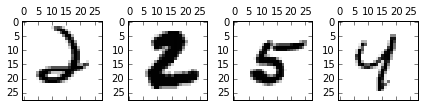

In [35]:
f, (ax1, ax2, ax3, ax4) = subplots(ncols=4)

imsize = (28, 28)
ax1.matshow(np.reshape(df.ix[35000,1:], imsize), cmap='gray_r')
ax2.matshow(np.reshape(df.ix[35001,1:], imsize), cmap='gray_r')
ax3.matshow(np.reshape(df.ix[35002,1:], imsize), cmap='gray_r')
ax4.matshow(np.reshape(df.ix[35003,1:], imsize), cmap='gray_r')

f.tight_layout();

In [37]:
#RandomForest
min_max_scaler = MinMaxScaler()
pca = PCA(n_components=80)
X = min_max_scaler.fit_transform(df.ix[:9999,1:])
X = pca.fit_transform(X)

y = df.ix[:9999,0]


tuned_parameters = [{'max_features': ['sqrt', 'log2'], 'n_estimators': [1000, 1500]}]

rf = GridSearchCV(RandomForestClassifier(min_samples_split=1, 
                                          n_jobs=-1), 
                  tuned_parameters, 
                  cv=3, 
                  verbose=2).fit(X, y)



Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_features=sqrt, n_estimators=1000 ............................
[CV] ................... max_features=sqrt, n_estimators=1000 -  18.7s
[CV] max_features=sqrt, n_estimators=1000 ............................
[CV] ................... max_features=sqrt, n_estimators=1000 -  19.3s
[CV] max_features=sqrt, n_estimators=1000 ............................
[CV] ................... max_features=sqrt, n_estimators=1000 -  18.8s
[CV] max_features=sqrt, n_estimators=1500 ............................
[CV] ................... max_features=sqrt, n_estimators=1500 -  28.2s
[CV] max_features=sqrt, n_estimators=1500 ............................
[CV] ................... max_features=sqrt, n_estimators=1500 -  28.0s
[CV] max_features=sqrt, n_estimators=1500 ............................
[CV] ................... max_features=sqrt, n_estimators=1500 -  29.4s
[CV] max_features=log2, n_estimators=1000 ............................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   18.7s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  4.4min finished


In [39]:
Xt = min_max_scaler.transform(df.ix[35000:,1:])
yt = df.ix[35000:,0]

yp = rf.predict(pca.transform(Xt))


print ('prediction accuracy: %.4f' % (1./len(yt) * sum( yp == yt )))



prediction accuracy: 0.9420


In [40]:
print (yt[:30].values.astype(int))

[2 2 5 4 7 6 0 6 4 5 4 8 5 2 6 2 3 9 3 9 4 0 4 5 2 0 6 5 5 0]


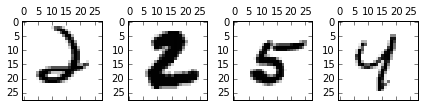

In [41]:
f, (ax1, ax2, ax3, ax4) = subplots(ncols=4)

imsize = (28, 28)
ax1.matshow(np.reshape(df.ix[35000,1:], imsize), cmap='gray_r')
ax2.matshow(np.reshape(df.ix[35001,1:], imsize), cmap='gray_r')
ax3.matshow(np.reshape(df.ix[35002,1:], imsize), cmap='gray_r')
ax4.matshow(np.reshape(df.ix[35003,1:], imsize), cmap='gray_r')

f.tight_layout();

In [42]:
#Submission attempts
#    First attempt: split data into three, build an SVM for each, 
#      majority voting for end prediction --> Kaggle score 0.97429


scalers = []
pca_xfrms = []
clfs = []

# compute indexes where to split the data
ixs = np.arange(df.shape[0])
splits = np.split(ixs, [14000, 28000])

tuned_parameters = [{'gamma': [0.1, 1e-2, 1e-3], 'C': [10, 100, 1000]}]

# use all data for training
for s in splits:
    min_max_scaler = MinMaxScaler()
    pca = PCA(n_components=80)

    # get training subset
    X = df.ix[s,1:].copy()
    y = df.ix[s,0].copy()
    
    # all the transformations
    X = min_max_scaler.fit_transform(X)
    X = pca.fit_transform(X)
    
    # train the classifier
    svm = GridSearchCV( SVC(), tuned_parameters, cv=3, verbose=1 ).fit(X, y)
    
    # store scaler, PCA transformer, and SVM classifier for this subset
    scalers.append(min_max_scaler)
    pca_xfrms.append(pca)
    clfs.append(svm)




[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   37.1s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  7.3min finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   37.1s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  7.3min finished



Fitting 3 folds for each of 9 candidates, totalling 27 fits

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   36.9s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  7.2min finished


In [46]:
df2 = pd.read_csv('/root/machine-learning-classify-handwritten-digit/randomForest/Data/test.csv')
df2 = df2.astype('float64')

In [47]:
preds = np.zeros((len(clfs), df2.shape[0]))

i = 0
for scaler, xfrm, clf in zip(scalers, pca_xfrms, clfs):
    Xt = df2.copy()
    Xt = scaler.transform(Xt)
    preds[i] = clf.predict(xfrm.transform(Xt))
    
    i += 1
    
total_pred = [np.bincount(x).argmax() for x in preds.T.astype(int)]



In [49]:
with open('/root/machine-learning-classify-handwritten-digit/randomForest/submission.csv', 'w') as of:
    of.write("ImageId,label\n")
    for x in enumerate(total_pred, start=1):
        of.write("%s,%s\n" % x)

In [ ]:
# Delong
#	0.97371 	2 	Sun, 25 Oct 2015 16:40:42 